In [147]:
import re
file = open("/home/skundu/ssd.pytorch/eval/predictions3.txt")
x = str(file.read())
x = x.split('@')[1]
#print(x)
x = x.split('\n')
#print(len(x))
#print(x[1])
new_list = []
table = str.maketrans(dict.fromkeys('()'))
for j in range(0,len(x)-1):
    #print(x[j])
    x[j] = re.sub('tensor', ' ', x[j])
    
    p = x[j].split(' ')
    del p[2], p[0]
    p[1] = p[1].translate(table)
    
    #print(p)
    
    for i in range(1, 6):
        p[i] = float(p[i])
    #p[4]=p[4]-p[2]+1
    #p[5] = p[5]-p[3]+1
    new_list.append(p)
    #print(p)

print(new_list)


[['bottle', 0.0126, 267.6166, 98.03, 291.5408, 161.7249], ['chair', 0.1079, 14.227661, 38.97008, 344.58, 485.06244], ['chair', 0.0248, 54.354935, 419.5275, 124.15268, 482.1376], ['chair', 0.0174, 86.89016, 440.54498, 162.14087, 495.75412], ['chair', 0.0145, 142.05746, 215.17062, 195.98479, 289.09033], ['chair', 0.0143, 79.375, 435.64008, 120.340385, 481.66425], ['chair', 0.0129, 18.69444, 223.37918, 270.3085, 470.89267], ['dog', 0.5328, 41.136562, 235.98322, 210.37006, 384.10025], ['dog', 0.2517, 18.69444, 223.37918, 270.3085, 470.89267], ['dog', 0.0125, 14.227661, 38.97008, 344.58, 485.06244], ['person', 0.9842, 20.961044, -0.95807016, 347.89233, 497.01297], ['sofa', 0.0241, 14.227661, 38.97008, 344.58, 485.06244]]


In [148]:
x = new_list
for one in x:
    print(one)

['bottle', 0.0126, 267.6166, 98.03, 291.5408, 161.7249]
['chair', 0.1079, 14.227661, 38.97008, 344.58, 485.06244]
['chair', 0.0248, 54.354935, 419.5275, 124.15268, 482.1376]
['chair', 0.0174, 86.89016, 440.54498, 162.14087, 495.75412]
['chair', 0.0145, 142.05746, 215.17062, 195.98479, 289.09033]
['chair', 0.0143, 79.375, 435.64008, 120.340385, 481.66425]
['chair', 0.0129, 18.69444, 223.37918, 270.3085, 470.89267]
['dog', 0.5328, 41.136562, 235.98322, 210.37006, 384.10025]
['dog', 0.2517, 18.69444, 223.37918, 270.3085, 470.89267]
['dog', 0.0125, 14.227661, 38.97008, 344.58, 485.06244]
['person', 0.9842, 20.961044, -0.95807016, 347.89233, 497.01297]
['sofa', 0.0241, 14.227661, 38.97008, 344.58, 485.06244]


In [149]:
def get_iou(x1, y1, x2, y2, X1, Y1, X2,Y2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    x1, y1, x2, y2 are the coordinates of bounding box1
    X1, Y1, X2, Y2 are the coordinates of bounding box2

    Returns:
    IOU in floats in range (0, 1)
    """
    assert x1 < x2
    assert y1 < y2
    assert X1 < X2
    assert Y1 < Y2

    # determine the coordinates of the intersection rectangle
    x_left = max(x1, X1)
    y_top = max(y1, Y1)
    x_right = min(x2, X2)
    y_bottom = min(y2, Y2)

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    
    bb1_area = (abs(x2 - x1)) * (abs(y2 - y1))
    bb2_area = (abs(X2 - X1)) * (abs(Y2 - Y1))

  
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [150]:
get_iou(x[0][2],x[0][3],x[0][4],x[0][5], x[1][2],x[1][3],x[1][4],x[1][5])
print(x)

[['bottle', 0.0126, 267.6166, 98.03, 291.5408, 161.7249], ['chair', 0.1079, 14.227661, 38.97008, 344.58, 485.06244], ['chair', 0.0248, 54.354935, 419.5275, 124.15268, 482.1376], ['chair', 0.0174, 86.89016, 440.54498, 162.14087, 495.75412], ['chair', 0.0145, 142.05746, 215.17062, 195.98479, 289.09033], ['chair', 0.0143, 79.375, 435.64008, 120.340385, 481.66425], ['chair', 0.0129, 18.69444, 223.37918, 270.3085, 470.89267], ['dog', 0.5328, 41.136562, 235.98322, 210.37006, 384.10025], ['dog', 0.2517, 18.69444, 223.37918, 270.3085, 470.89267], ['dog', 0.0125, 14.227661, 38.97008, 344.58, 485.06244], ['person', 0.9842, 20.961044, -0.95807016, 347.89233, 497.01297], ['sofa', 0.0241, 14.227661, 38.97008, 344.58, 485.06244]]


In [151]:
iou_list = []
n = 0
for i in range(len(x)):
    for j in range(len(x)):
        if i != j:
            area = get_iou(x[i][2],x[i][3],x[i][4],x[i][5], x[j][2],x[j][3],x[j][4],x[j][5])
            if area>=0.50:
                #print(area)
                x[i].insert(6, x[j][0])
                x[i].insert(7, x[j][1])
                n = n+1
print(n)
           

14


In [152]:

from collections import deque
for each in x:
    a = deque(each)
    a.rotate(-2)
    print(list(a))
    
#print(bbox)


[267.6166, 98.03, 291.5408, 161.7249, 'bottle', 0.0126]
[14.227661, 38.97008, 344.58, 485.06244, 'sofa', 0.0241, 'person', 0.9842, 'dog', 0.0125, 'chair', 0.1079]
[54.354935, 419.5275, 124.15268, 482.1376, 'chair', 0.0248]
[86.89016, 440.54498, 162.14087, 495.75412, 'chair', 0.0174]
[142.05746, 215.17062, 195.98479, 289.09033, 'chair', 0.0145]
[79.375, 435.64008, 120.340385, 481.66425, 'chair', 0.0143]
[18.69444, 223.37918, 270.3085, 470.89267, 'dog', 0.2517, 'chair', 0.0129]
[41.136562, 235.98322, 210.37006, 384.10025, 'dog', 0.5328]
[18.69444, 223.37918, 270.3085, 470.89267, 'chair', 0.0129, 'dog', 0.2517]
[14.227661, 38.97008, 344.58, 485.06244, 'sofa', 0.0241, 'person', 0.9842, 'chair', 0.1079, 'dog', 0.0125]
[20.961044, -0.95807016, 347.89233, 497.01297, 'sofa', 0.0241, 'dog', 0.0125, 'chair', 0.1079, 'person', 0.9842]
[14.227661, 38.97008, 344.58, 485.06244, 'person', 0.9842, 'dog', 0.0125, 'chair', 0.1079, 'sofa', 0.0241]


In [153]:
iou_list = []
for i in range(0,len(x)):
    for j in range(i, len(x)):
        area = get_iou(x[i][2],x[i][3],x[i][4],x[i][5], x[j][2],x[j][3],x[j][4],x[j][5])
        if area>=0.50:
            iou_list.append(area)
            if x[i][1]> x[j][1]:
                x[i].insert(6, x[j][0])
                x[i].insert(7, x[j][1])
            elif x[i][1]< x[j][1]:
                x[j].insert(6, x[i][0])
                x[j].insert(7, x[i][1])

In [154]:

print(x)
multiple_boxes = []
for i in range(0,12):
    if len(x[i])>6:
        multiple_boxes.append(x[i])
        print(x[i])
    else:
        continue

        
#print(len(multiple_boxes))
#print(multiple_boxes)

[['bottle', 0.0126, 267.6166, 98.03, 291.5408, 161.7249], ['chair', 0.1079, 14.227661, 38.97008, 344.58, 485.06244, 'sofa', 0.0241, 'dog', 0.0125, 'sofa', 0.0241, 'person', 0.9842, 'dog', 0.0125], ['chair', 0.0248, 54.354935, 419.5275, 124.15268, 482.1376], ['chair', 0.0174, 86.89016, 440.54498, 162.14087, 495.75412], ['chair', 0.0145, 142.05746, 215.17062, 195.98479, 289.09033], ['chair', 0.0143, 79.375, 435.64008, 120.340385, 481.66425], ['chair', 0.0129, 18.69444, 223.37918, 270.3085, 470.89267, 'dog', 0.2517], ['dog', 0.5328, 41.136562, 235.98322, 210.37006, 384.10025], ['dog', 0.2517, 18.69444, 223.37918, 270.3085, 470.89267, 'chair', 0.0129, 'chair', 0.0129], ['dog', 0.0125, 14.227661, 38.97008, 344.58, 485.06244, 'sofa', 0.0241, 'person', 0.9842, 'chair', 0.1079], ['person', 0.9842, 20.961044, -0.95807016, 347.89233, 497.01297, 'sofa', 0.0241, 'dog', 0.0125, 'chair', 0.1079, 'sofa', 0.0241, 'dog', 0.0125, 'chair', 0.1079], ['sofa', 0.0241, 14.227661, 38.97008, 344.58, 485.06244,

In [22]:
print(len(iou_list))

19


In [23]:
print(iou_list)

[1.0, 1.0, 1.0, 0.870679731539875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.870679731539875, 1.0, 1.0, 0.870679731539875, 1.0]


Text(125, 200, 'Train, 1.00')

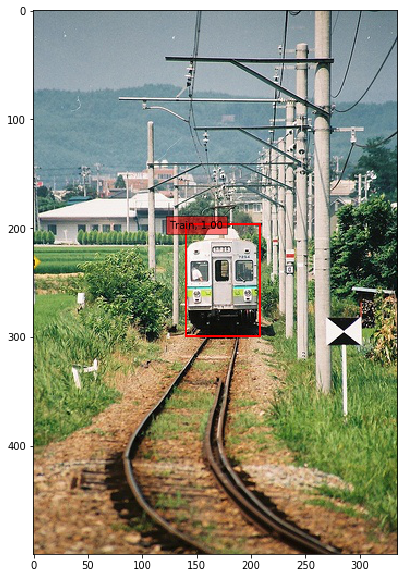

In [18]:
import os
import sys
import cv2
module_path = os.path.abspath(os.path.join('/home/skundu/ssd.pytorch/'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline
from matplotlib import pyplot as plt
from data import VOCDetection, VOC_ROOT, VOCAnnotationTransform
# here we specify year (07 or 12) and dataset ('test', 'val', 'train') 
testset = VOCDetection(VOC_ROOT, [('2007', 'test')], None, VOCAnnotationTransform())
img_id = 1
image = testset.pull_image(img_id)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))

plt.imshow(rgb_image) # plot the image for matplotlib

currentAxis = plt.gca()
currentAxis.add_patch(plt.Rectangle((139.70316, 196.18417), 68.57992000000002, 103.27404999999999, fill=False, edgecolor='red', linewidth=2))
currentAxis.text(125, 200, "Train, 1.00", bbox={'facecolor':'red', 'alpha':0.5})